In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
offers = pd.read_csv("../data/laraData/offer_events.csv", sep = ';')
applications = pd.read_csv("../data/laraData/application_events.csv", sep = ';')
workitems = pd.read_csv("../data/laraData/workitem_events.csv", sep = ';')
events = pd.read_csv("../data/laraData/events.csv", sep = ';', low_memory = False)

In [3]:
workitems.head()

,A_ID,WI_HIST_ID,WI_HIST_DT_CREATED,WI_ID,WI_USER_CREATED,WI_ACTION,WI_ACTION_DESC,WI_QUEUE,WI_QUEUE_DESC,event,...,NUMBER_OF_CHILDREN,MARITAL_STATUS,SEX,HOUSING_TYPE,INCOMEAMOUNT_YEAR,SCE_CREDITSCORE,SCE_ACCEPTED,SCE_ACCEPTED_OVERRIDE,SCE_MAX_AMOUNT,SCE_MAX_AMOUNT_OVERRIDE
0,719696,2756085,"4/1/2017 19:18:29,800000",512175,USER_31,944,Verkregen,25,Nabellen incomplete dossiers,W_Call incomplete files,...,0.0,Samenwonend,Vrouw,Koophuis,41088.0,784.0,1.0,1.0,49340.0,49340.0
1,719696,2754294,"4/1/2017 13:07:45,692000",512175,USER_100,944,Verkregen,25,Nabellen incomplete dossiers,W_Call incomplete files,...,0.0,Samenwonend,Vrouw,Koophuis,41088.0,784.0,1.0,1.0,49340.0,49340.0
2,719696,2757702,"5/1/2017 11:15:24,925000",512842,USER_119,942,Aangemaakt,24,Valideren aanvraag,W_Validate application,...,0.0,Samenwonend,Vrouw,Koophuis,41088.0,784.0,1.0,1.0,49340.0,49340.0
3,719696,2761252,"6/1/2017 10:17:19,545000",512842,USER_100,943,Verwijderd,24,Valideren aanvraag,W_Validate application,...,0.0,Samenwonend,Vrouw,Koophuis,41088.0,784.0,1.0,1.0,49340.0,49340.0
4,719696,2757704,"5/1/2017 11:15:50,183000",512842,USER_119,945,Vrijgeven,24,Valideren aanvraag,W_Validate application,...,0.0,Samenwonend,Vrouw,Koophuis,41088.0,784.0,1.0,1.0,49340.0,49340.0


In [4]:
applications.head()

,A_ID,A_DT_CREATED,A_INIT_REQ_AMT,A_USER_CREATED,A_APPLICATIONTYPE,A_APPLICATIONTYPE_DESC,A_LOANGOALTYPE,A_LOANGOALTYPE_DESC,AS_ID,AS_APPLICATIONSTATE,...,NUMBER_OF_CHILDREN,MARITAL_STATUS,SEX,HOUSING_TYPE,SCE_CREDITSCORE,SCE_ACCEPTED,SCE_ACCEPTED_OVERRIDE,SCE_MAX_AMOUNT,SCE_MAX_AMOUNT_OVERRIDE,INCOMEAMOUNT_YEAR
0,719696,"1/1/2017 2:42:29,064000",29000.0,USER_1,520,Nieuw krediet,866.0,Auto,1453642,511,...,0.0,Samenwonend,Vrouw,Koophuis,784.0,1.0,1.0,49340.0,49340.0,41088.0
1,719696,"1/1/2017 2:42:29,064000",29000.0,USER_1,520,Nieuw krediet,866.0,Auto,1454067,513,...,0.0,Samenwonend,Vrouw,Koophuis,784.0,1.0,1.0,49340.0,49340.0,41088.0
2,719696,"1/1/2017 2:42:29,064000",29000.0,USER_1,520,Nieuw krediet,866.0,Auto,1458788,517,...,0.0,Samenwonend,Vrouw,Koophuis,784.0,1.0,1.0,49340.0,49340.0,41088.0
3,719696,"1/1/2017 2:42:29,064000",29000.0,USER_1,520,Nieuw krediet,866.0,Auto,1456650,516,...,0.0,Samenwonend,Vrouw,Koophuis,784.0,1.0,1.0,49340.0,49340.0,41088.0
4,719696,"1/1/2017 2:42:29,064000",29000.0,USER_1,520,Nieuw krediet,866.0,Auto,1453643,512,...,0.0,Samenwonend,Vrouw,Koophuis,784.0,1.0,1.0,49340.0,49340.0,41088.0


In [5]:
created = applications.loc[applications.event == "A_Create Application"]
print(created.shape[0])
print(len(list(set(created.A_ID))))

submitted = applications.loc[applications.event == "A_Submitted"]
print(submitted.shape[0])
print(len(list(set(submitted.A_ID))))

concept = applications.loc[applications.event == "A_Concept"]
print(concept.shape[0])
print(len(list(set(concept.A_ID))))

25467
25467
54709
54709
45679
45678


A_Concept denotes the first automatic check that is done online. Let's have a look at the applications that fail this particular test.

<font color='red'><i>Critical step: Since we are dealing with timestamped data, it can happen that there applications whose A_Concept event is in the given dataset, while its A_Submitted event is not in the given dataset</i></font>

In [6]:
applications_submitted = list(submitted.A_ID)
applications_concept = list(set(applications_submitted).intersection(set(concept.A_ID)))
print(len(applications_concept))
applications_fail_test = list(set(applications_submitted).difference(set(applications_concept)))
len(applications_fail_test)

34095


20614

In [7]:
came_through = list(set(applications.loc[applications.event == 'A_Pending'].A_ID))
len(set(applications_fail_test).intersection(set(came_through)))# just to double-check

0

In [8]:
fail = applications.loc[applications.A_ID.isin(applications_fail_test)]
fail = fail.drop_duplicates(subset='A_ID', keep="last")
fail.shape[0]

20614

In [9]:
success = applications.loc[~applications.A_ID.isin(applications_fail_test)]
success = success.drop_duplicates(subset='A_ID', keep="last")
success.shape[0]

45678

In [10]:
accept = applications.loc[applications.event == 'A_Pending']
accept.shape, len(set(accept.A_ID)) # obviously no need to drop duplicates

((13571, 27), 13571)

<font color='red'><i>Since we want to compare the applications/applicants who fail the initial tests, we have to remove these applications from the 'reject-controlgroup'. This is due to the fact that the applications that are immediately rejected, also get an event record with the 'A_Denied'/'A_Cancelled' label.</i></font>

In [11]:
reject = applications.loc[applications.event.isin(['A_Denied', 'A_Cancelled']) & ~applications.A_ID.isin(applications_fail_test)]
reject.shape

(31733, 27)

Candidate attributes for applicant comparisons:

* A_APPLICATIONTYPE_DESC
* A_LOANGOALTYPE_DESC
* BIRTHYEAR
* CITY
* MARITAL_STATUS  
* NUMBER_OF_CHILDREN  
* SEX 
* HOUSING_TYPE
* A_INIT_REQ_AMT
* INCOMEAMOUNT_YEAR

In [12]:
categorical = ['A_APPLICATIONTYPE_DESC', 'A_LOANGOALTYPE_DESC', 'MARITAL_STATUS', 'SEX', 'HOUSING_TYPE']
numeric = ['A_INIT_REQ_AMT', 'NUMBER_OF_CHILDREN', 'INCOMEAMOUNT_YEAR']
need_bucketizing = ['BIRTHYEAR', 'CITY', 'INCOMEAMOUNT_YEAR', 'A_INIT_REQ_AMT']

In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    // return true;
}

<IPython.core.display.Javascript object>

Applicants rejected immediately by the system:


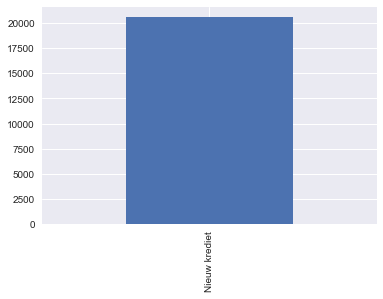

Applicants accepted (initially) by the system:


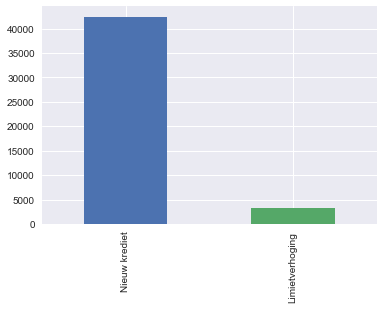

Applicants accepted offer


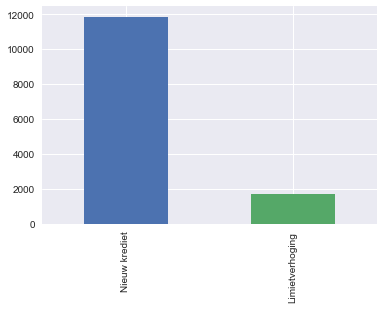

Denied applicants / cancelled offers


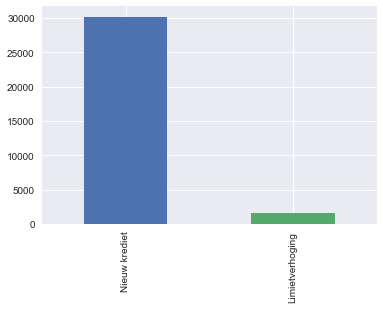

Applicants rejected immediately by the system:


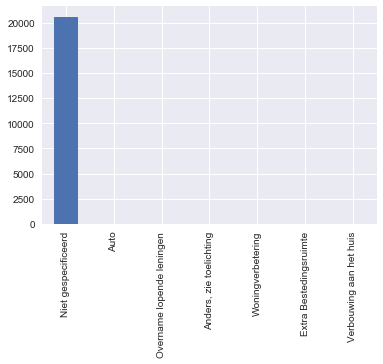

Applicants accepted (initially) by the system:


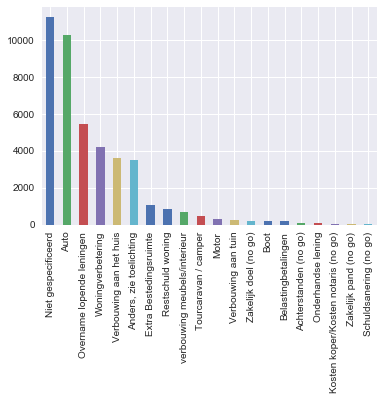

Applicants accepted offer


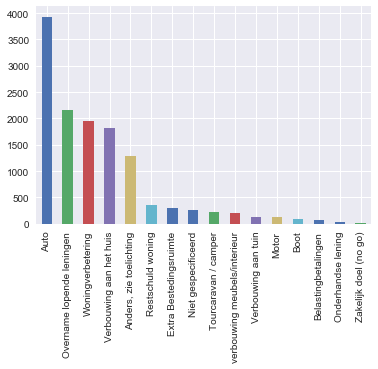

Denied applicants / cancelled offers


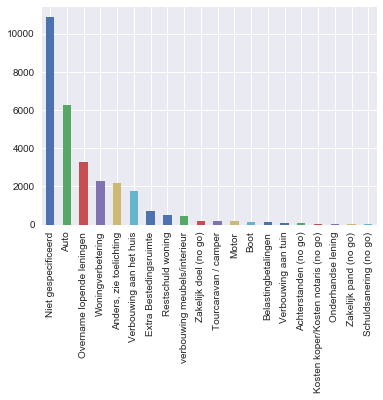

Applicants rejected immediately by the system:


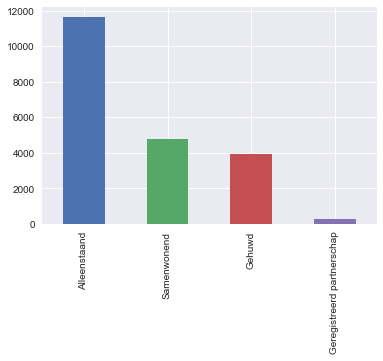

Applicants accepted (initially) by the system:


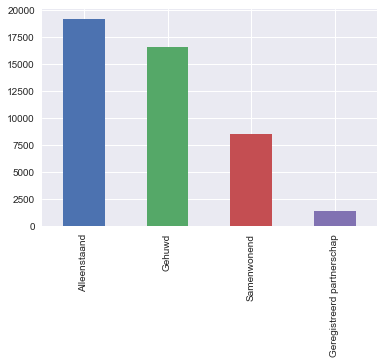

Applicants accepted offer


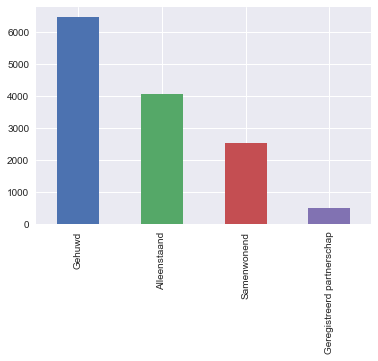

Denied applicants / cancelled offers


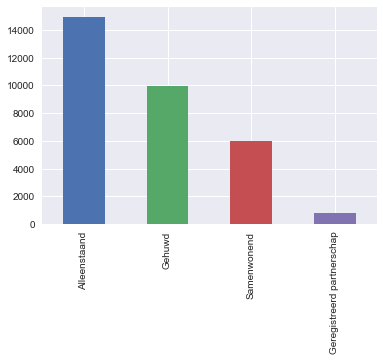

Applicants rejected immediately by the system:


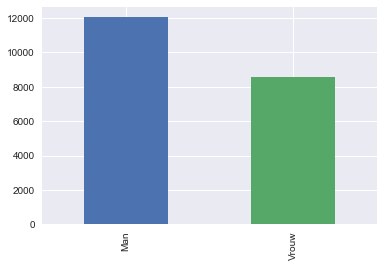

Applicants accepted (initially) by the system:


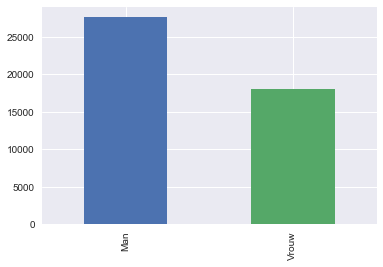

Applicants accepted offer


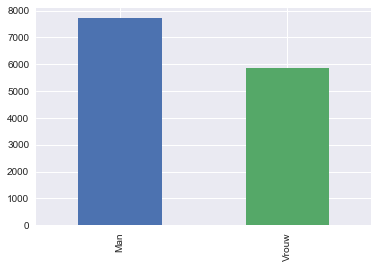

Denied applicants / cancelled offers


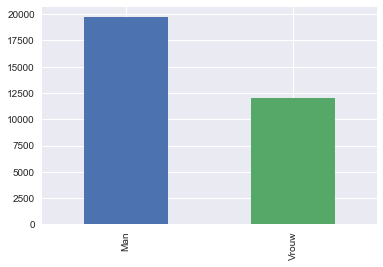

Applicants rejected immediately by the system:


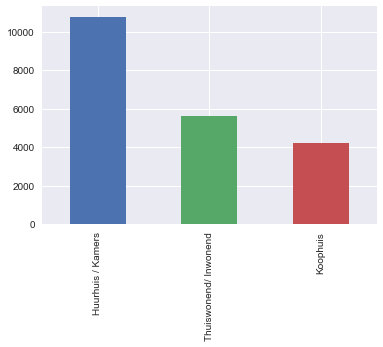

Applicants accepted (initially) by the system:


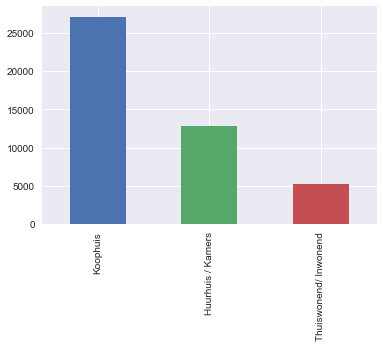

Applicants accepted offer


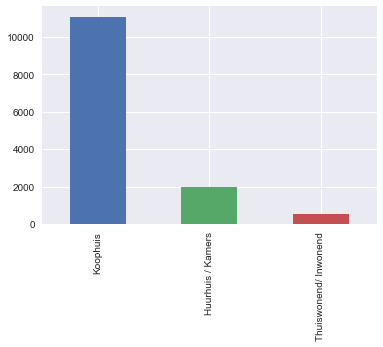

Denied applicants / cancelled offers


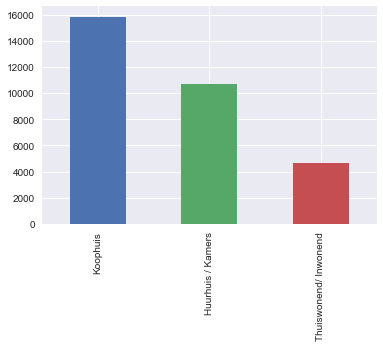

In [14]:
for attribute in categorical:
    print("Applicants rejected immediately by the system:")
    fail[attribute].value_counts().plot(kind = 'bar')
    plt.show()
    
    print("Applicants accepted (initially) by the system:")
    success[attribute].value_counts().plot(kind = 'bar')
    plt.show()
    
    print("Applicants accepted offer")
    accept[attribute].value_counts().plot(kind = 'bar')
    plt.show()
    
    print("Denied applicants / cancelled offers")
    reject[attribute].value_counts().plot(kind = 'bar')
    plt.show()

<font color='red'>First of all, note that we should be careful by making conclusions based on thes results, since there are differences in sizes between the groups</font>

<font color='green'>We can, however, immediately see that applications that get rejected immediately are always for 'Nieuw krediet' loans'</font>

In [15]:
'''
for attribute in categorical:
    print("Applicants rejected immediately by the system:")
    unique_values = list(set(fail[attribute].values))
    for val in unique_values:
        abs_val = fail.loc[fail[attribute] == val].shape[0]
        print("percentage of", val, "in rejected applications is: ", (abs_val / fail.shape[0]) * 100, "%")
    print()
    
    print("Applicants accepted (initially) by the system:")
    unique_values = list(set(success[attribute].values))
    for val in unique_values:
        abs_val = success.loc[success[attribute] == val].shape[0]
        print("percentage of", val, "in (initially) accepted applications is: ", (abs_val / success.shape[0]) * 100, "%")
    print()
    
    print("Applicants accepted offer")
    unique_values = list(set(accept[attribute].values))
    for val in unique_values:
        abs_val = accept.loc[accept[attribute] == val].shape[0]
        print("percentage of", val, "in applications with an accepted offer is: ", (abs_val / accept.shape[0]) * 100, "%")
    print()
    
    print("Denied applicants / cancelled offers")
    unique_values = list(set(reject[attribute].values))
    for val in unique_values:
        abs_val = reject.loc[reject[attribute] == val].shape[0]
        print("percentage of", val, "in denied applications/cancelled offers offer is: ", (abs_val / reject.shape[0]) * 100, "%")
    print("\n\n\n") # empty line '''

'\nfor attribute in categorical:\n    print("Applicants rejected immediately by the system:")\n    unique_values = list(set(fail[attribute].values))\n    for val in unique_values:\n        abs_val = fail.loc[fail[attribute] == val].shape[0]\n        print("percentage of", val, "in rejected applications is: ", (abs_val / fail.shape[0]) * 100, "%")\n    print()\n    \n    print("Applicants accepted (initially) by the system:")\n    unique_values = list(set(success[attribute].values))\n    for val in unique_values:\n        abs_val = success.loc[success[attribute] == val].shape[0]\n        print("percentage of", val, "in (initially) accepted applications is: ", (abs_val / success.shape[0]) * 100, "%")\n    print()\n    \n    print("Applicants accepted offer")\n    unique_values = list(set(accept[attribute].values))\n    for val in unique_values:\n        abs_val = accept.loc[accept[attribute] == val].shape[0]\n        print("percentage of", val, "in applications with an accepted offer is:

In [16]:
for attribute in categorical:
    print("Comparison of ", attribute, " across different groups")
    print('---------------------------------------------------------------')
    all_values = set(list(fail[attribute].values) + list(success[attribute].values) +
                     list(accept[attribute].values) + list(reject[attribute].values))
    if (np.nan in all_values):
        all_values.remove(np.nan)
    
    for val in sorted(all_values):
        abs_val = fail.loc[fail[attribute] == val].shape[0]
        print("percentage of", val, "in rejected applications is: ", (abs_val / fail.shape[0]) * 100, "%")
        
        abs_val = success.loc[success[attribute] == val].shape[0]
        print("percentage of", val, "in (initially) accepted applications is: ", (abs_val / success.shape[0]) * 100, "%")
        
        abs_val = accept.loc[accept[attribute] == val].shape[0]
        print("percentage of", val, "in applications with an accepted offer is: ", (abs_val / accept.shape[0]) * 100, "%")
        
        abs_val = reject.loc[reject[attribute] == val].shape[0]
        print("percentage of", val, "in denied applications/cancelled offers offer is: ", (abs_val / reject.shape[0]) * 100, "%")
        print()
    
    print("\n\n\n") # empty line
        

Comparison of  A_APPLICATIONTYPE_DESC  across different groups
---------------------------------------------------------------
percentage of Limietverhoging in rejected applications is:  0.0 %
percentage of Limietverhoging in (initially) accepted applications is:  7.136914926222689 %
percentage of Limietverhoging in applications with an accepted offer is:  12.637241176037136 %
percentage of Limietverhoging in denied applications/cancelled offers offer is:  4.830933098036744 %

percentage of Nieuw krediet in rejected applications is:  100.0 %
percentage of Nieuw krediet in (initially) accepted applications is:  92.86308507377731 %
percentage of Nieuw krediet in applications with an accepted offer is:  87.36275882396286 %
percentage of Nieuw krediet in denied applications/cancelled offers offer is:  95.16906690196325 %





Comparison of  A_LOANGOALTYPE_DESC  across different groups
---------------------------------------------------------------
percentage of Achterstanden (no go) in rej

In [17]:
stats = applications.drop_duplicates(subset='A_ID', keep="last")
print("Nieuw krediet: ", stats.loc[stats.A_APPLICATIONTYPE_DESC == 'Nieuw krediet'].shape[0] / stats.shape[0] * 100, "%")
print("Alleenstaand: ", stats.loc[stats.MARITAL_STATUS == 'Alleenstaand'].shape[0] / stats.shape[0] * 100, "%")
print("Sex: ", stats.loc[stats.SEX == 'Man'].shape[0] / stats.shape[0] * 100, "%")
print("Huurkuis/kamers: ", stats.loc[stats.HOUSING_TYPE == 'Huurhuis / Kamers'].shape[0] / stats.shape[0] * 100, "%")

Nieuw krediet:  95.08236287938213 %
Alleenstaand:  46.48373861099378 %
Sex:  59.86996922705605 %
Huurkuis/kamers:  35.542750256441195 %


### <font color='darkgreen'>Difference between the groups that fail/succeed in the first automated test</font>
#### Interesting observations (which can be visualized)
* <b>A_APPLICATIONTYPE_DESC:</b> <i>All applications which are rejected immediately by the system, are applications of the type 'Nieuw Krediet'</i> <font color='red'>In the online application process there is no option to specify the loan type, so it can be the case that the system just classifies it as 'nieuw krediet' and it is only changed to 'limietsverhoging' in the subsequent phone calls.</font>
<br>

* <b>A_LOANGOALTYPE_DESC:</b> <i>Nothing interesting here. The loangoal is not specified in the part of the process. The loan goal is probably identified during the subsequent phone calls</i>
<br>

* <b>MARITAL_STATUS:</b> <i>Applicants whom are single, are relatively more dominant than maried applicants in the group that is rejected immediately.</i>
<br>

* <b>SEX:</b> <i>Nothing interesting here. No significant differences in the distributions of the groups.</i>
<br>

* <b>HOUSING_TYPE:</b> <i>Applicants who belong to the groups "Thuiswonend/inwonend" or "Huurhuis/Kamers" are more dominant than applicants belonging to the "Koophuis" group in the group that is rejected immediately.</i>
<br>

### <font color='darkgreen'>Most dominant groups in the immediately rejected applications</font>
* <b>A_APPLICATIONTYPE_DESC:</b> <i>Nieuw Krediet:</i> 100% (vs. 95% in total)
<br>

* <b>A_LOANGOALTYPE_DESC:</b> <i>Not specified: </i> 99.9% <font color='red'>(not possible at this stage in the application process)</font>
<br>

* <b>MARITAL_STATUS:</b> <i>Alleenstaand: </i> 56.5% (vs. 46.5% in total)
<br>

* <b>SEX:</b> <i>Man: </i> 58.5% (vs. 59.9% in total)
<br>

* <b>HOUSING_TYPE:</b> <i>Huurhuis / Kamers: </i> 52.3% (vs. 35.5%)
<br>

### <font color='darkgreen'>Difference between the applications that convert into an offer / get denied or cancelled</font>
#### Interesting observations (which can be visualized)
* <b>A_APPLICATIONTYPE_DESC:</b> <i>Applications of the type "Limietsverhoging" seem to convert better than the "Nieuw-krediet"-applications (on average)</i> 

* <b>A_LOANGOALTYPE_DESC:</b> <i>"Overname lopende leningen", "Auto" and "Woningverbetering" related applications seem to covert better than other loan-goal types <font color='red'>(when comparing their relative presence in the different groups)</font></i>
<br>

* <b>MARITAL_STATUS:</b> <i>Applicants whom are married, convert relatively better than single applicants.</i>
<br>

* <b>SEX:</b> <i>Nothing interesting here. No significant differences in the distributions of the groups.</i>
<br>

* <b>HOUSING_TYPE:</b><i>Applicants who belong to the group "Koophuis"s seem to convert better than applicants belonging to the "Thuiswonend/inwonend" or "Huurhuis/Kamers" groups.</i>
<br>

### Bucketizing of numeric attributes

In [18]:
need_bucketizing

['BIRTHYEAR', 'CITY', 'INCOMEAMOUNT_YEAR', 'A_INIT_REQ_AMT']

In [19]:
eigtheen_twentyfive = list(range(1993, max(applications.BIRTHYEAR) + 1))
twentyfive_forty = list(range(1978, 1993))
forty_fiftyfive = list(range(1963, 1978))
fiftyfive_older = list(range(min(applications.BIRTHYEAR), 1978))

In [20]:
def age_label(birthyear):
    if birthyear in eigtheen_twentyfive:
        return '18-25'
    elif birthyear in twentyfive_forty:
        return '25-40'
    elif birthyear in forty_fiftyfive:
        return '40-55'
    else: 
        return '55+'

In [21]:
applications['age_group'] = applications.apply(lambda row: age_label(row.BIRTHYEAR), axis = 1)

In [22]:
zero_tenK = (0, 10000)
tenK_twentyK = (10000, 20000)
twentyK_thirtyfourK = (20000, 34000)
thirthyfourK_sixtyeightK = (34000, 68000)
sixtyeightK_hundredK = (68000, 100000)
hundredK_plus = (100000, max(applications.INCOMEAMOUNT_YEAR))

In [23]:
def income_label(income):
    if zero_tenK[0] <= income < zero_tenK[1]:
        return '0-10K'
    elif tenK_twentyK[0] <= income < tenK_twentyK[1]:
        return '10K-20K'
    elif twentyK_thirtyfourK[0] <= income < twentyK_thirtyfourK[1]:
        return '20K-34K'
    elif thirthyfourK_sixtyeightK[0] <= income < thirthyfourK_sixtyeightK[1]:
        return '34K-68K'
    elif sixtyeightK_hundredK[0] <= income < sixtyeightK_hundredK[1]:
        return '68K-100K'
    else: 
        return '100K+'

In [24]:
applications['income_group'] = applications.apply(lambda row: income_label(row.INCOMEAMOUNT_YEAR), axis = 1)

In [25]:
zero_tenK = (0, 10000)
tenK_twentyK = (10000, 20000)
twentyK_fortyK = (20000, 40000)
fortyK_plus = (40000, max(applications.A_INIT_REQ_AMT))

In [26]:
def req_amount_label(amount):
    if zero_tenK[0] <= amount < zero_tenK[1]:
        return '0-10K'
    elif tenK_twentyK[0] <= amount < tenK_twentyK[1]:
        return '10K-20K'
    elif twentyK_fortyK[0] <= amount < twentyK_fortyK[1]:
        return '20K-40K'
    else: 
        return '40K+'

In [27]:
applications['req_amount_group'] = applications.apply(lambda row: req_amount_label(row.A_INIT_REQ_AMT), axis = 1)

In [28]:
fail = applications.loc[applications.A_ID.isin(applications_fail_test)]
fail = fail.drop_duplicates(subset='A_ID', keep="last")

success = applications.loc[~applications.A_ID.isin(applications_fail_test)]
success = success.drop_duplicates(subset='A_ID', keep="last")

accept = applications.loc[applications.event == 'A_Pending']
accept.shape, len(set(accept.A_ID)) # obviously no need to drop duplicates

reject = applications.loc[applications.event.isin(['A_Denied', 'A_Cancelled']) & ~applications.A_ID.isin(applications_fail_test)]

In [29]:
bucketized = ['age_group', 'income_group', 'req_amount_group']

In [41]:
for attribute in bucketized:
    print("Comparison of ", attribute, " across different groups")
    print('---------------------------------------------------------------')
    all_values = set(list(fail[attribute].values) + list(success[attribute].values) +
                     list(accept[attribute].values) + list(reject[attribute].values))
    if (np.nan in all_values):
        all_values.remove(np.nan)
        
    highest_diff_fail_total = (None, 0)
    highest_diff_fail_accept = (None, 0)
    highest_diff_reject_accept = (None, 0)
    
    for val in sorted(all_values):
        abs_val = fail.loc[fail[attribute] == val].shape[0]
        percentage_fail =  (abs_val / fail.shape[0]) * 100
        print("percentage of", val, "in rejected applications is: ", percentage_fail, "%")
        diff_fail_total = abs(percentage_fail - ((stats.loc[stats[attribute] == val].shape[0]) / stats.shape[0] * 100))
        if (diff_fail_total > highest_diff_fail_total[1]):
            highest_diff_fail_total = (val, diff_fail_total)
        
        abs_val = success.loc[success[attribute] == val].shape[0]
        percentage_success = (abs_val / success.shape[0]) * 100
        print("percentage of", val, "in (initially) accepted applications is: ", percentage_success, "%")
        
        abs_val = accept.loc[accept[attribute] == val].shape[0]
        percentage_accept  = (abs_val / accept.shape[0]) * 100
        print("percentage of", val, "in applications with an accepted offer is: ", percentage_accept, "%")
        diff_fail_accept = abs(percentage_accept - percentage_fail)
        if (diff_fail_accept > highest_diff_fail_accept[1]):
            highest_diff_fail_accept = (val, diff_fail_accept)
        
        abs_val = reject.loc[reject[attribute] == val].shape[0]
        percentage_reject = (abs_val / reject.shape[0]) * 100
        print("percentage of", val, "in denied applications/cancelled offers offer is: ", percentage_reject, "%")
        diff_reject_accept = abs(percentage_reject - percentage_accept)
        if (diff_reject_accept > highest_diff_reject_accept[1]):
            highest_diff_reject_accept = (val, diff_reject_accept)
        print()
    print("highest difference group/value between fail and total is ", highest_diff_fail_total[0], " with a percentual difference of ", highest_diff_fail_total[1])
    print("highest difference group/value between fail and accept is ", highest_diff_fail_accept[0], " with a percentual difference of ", highest_diff_fail_accept[1])
    print("highest difference group/value between reject and accept is ", highest_diff_reject_accept[0], " with a percentual difference of ", highest_diff_reject_accept[1])
    print("\n\n\n") # empty line
        

Comparison of  age_group  across different groups
---------------------------------------------------------------
percentage of 18-25 in rejected applications is:  23.65382749587659 %
percentage of 18-25 in (initially) accepted applications is:  8.5117562064889 %
percentage of 18-25 in applications with an accepted offer is:  2.542185542701348 %
percentage of 18-25 in denied applications/cancelled offers offer is:  10.994863391422179 %

percentage of 25-40 in rejected applications is:  45.9736101678471 %
percentage of 25-40 in (initially) accepted applications is:  44.90126537939489 %
percentage of 25-40 in applications with an accepted offer is:  40.181268882175225 %
percentage of 25-40 in denied applications/cancelled offers offer is:  46.881794976837995 %

percentage of 40-55 in rejected applications is:  22.445910546230717 %
percentage of 40-55 in (initially) accepted applications is:  33.000569201803934 %
percentage of 40-55 in applications with an accepted offer is:  40.431803109

In [96]:
stats = applications.drop_duplicates(subset='A_ID', keep="last")
stats.dropna(inplace = True)
print("age_group: ", stats.loc[stats.age_group == '25-40'].shape[0] / stats.shape[0] * 100, "%")
print("income_group: ", stats.loc[stats.income_group == '10K-20K'].shape[0] / stats.shape[0] * 100, "%")
print("req_amount_group: ", stats.loc[stats.req_amount_group == '0-10K'].shape[0] / stats.shape[0] * 100, "%")

age_group:  43.90526041817288 %
income_group:  6.174267619075161 %
req_amount_group:  30.035570722114578 %


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### <font color='darkgreen'>Most dominant groups in the immediately rejected applications</font>
* <b>age_group:</b> <i>25-40:</i> 46.0% (vs. 45.2% in total)
<br>

* <b>income_group:</b> <i>10-20K: </i> 38.0% (vs. 19.2% in total)
<br>

* <b>req_amount_group:</b> <i>0-10K: </i> 57.7% (vs. 40.0% in total)
<br>

### <font color='darkgreen'>Groups with the highest difference between <b>fail and total</b></font>
* <b>age_group:</b> <i>18-25:</i> 10.4% 
<br>

* <b>income_group:</b> <i>10-20K: </i> 18.8%
<br>

* <b>req_amount_group:</b> <i>0-10K: </i> 17.7%
<br>

### <font color='darkgreen'>Groups with the highest difference between <b>fail and accept</b></font>
* <b>age_group:</b> <i>18-25:</i> 21.1%
<br>

* <b>income_group:</b> <i>34-68K: </i> 36.5%
<br>

* <b>req_amount_group:</b> <i>0-10K: </i> 38.4%
<br>

### <font color='darkgreen'>Groups with the highest difference between <b>reject and accept</b></font>
* <b>age_group:</b> <i>40-55:</i> 10.6%
<br>

* <b>income_group:</b> <i>34-68K: </i> 25.3%
<br>

* <b>req_amount_group:</b> <i>0-10K: </i> 18.0%
<br>

In [149]:
def plot_percentages(data, var, x_title = None, plot_title = None, palette = "Greens_d", max_percentage = 100):
    size = data.shape[0]
    unq = sorted(set(data[var].values))
    result = pd.Series(index = unq)
    for val in unq:
        result[val] = data.loc[data[var] == val].shape[0] / size * 100
    df = pd.DataFrame(result)
    df.reset_index(level=0, inplace=True)
    df.columns = [var, 'percentage']
    ax = sns.barplot(x=var, y = 'percentage', data = df, palette = palette)
    sns.plt.ylim(0, max_percentage)
    sns.plt.title(plot_title, size=18, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.5)
    ax.set(xlabel=x_title, ylabel='Percentage')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


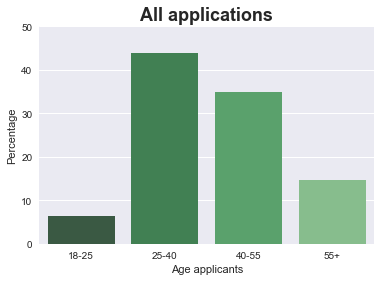

In [132]:
plot_percentages(stats, 'age_group', 'Age applicants', 'All applications', 'Greens_d', 50)
plt.savefig('age_groups_total.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


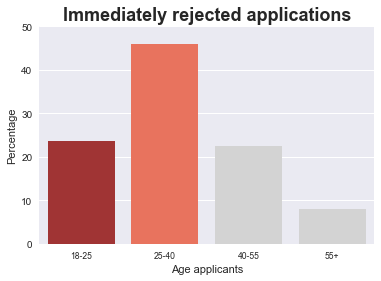

In [175]:
plot_percentages(fail, 'age_group', 'Age applicants', 'Immediately rejected applications', ['firebrick', 'tomato', 'lightgrey', 'lightgrey'], 50)
plt.savefig('age_groups_fail.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


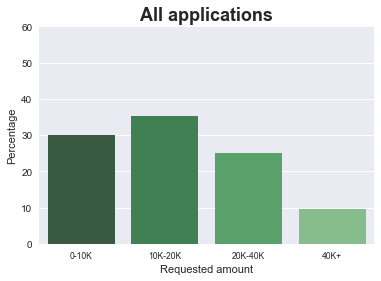

In [163]:
plot_percentages(stats, 'req_amount_group', 'Requested amount', 'All applications', 'Greens_d', 60)
plt.savefig('req_amount_groups_total.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


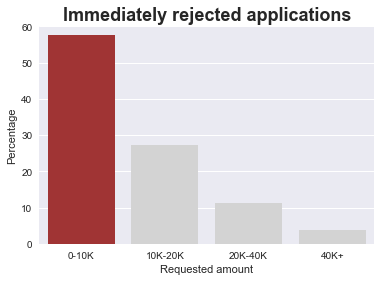

In [135]:
plot_percentages(fail, 'req_amount_group', 'Requested amount', 'Immediately rejected applications', ['firebrick', 'lightgrey', 'lightgrey', 'lightgrey'], 60)
plt.savefig('req_amount_groups_fail.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


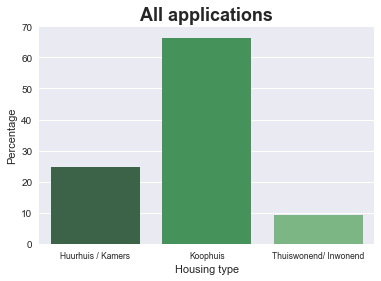

In [191]:
plot_percentages(stats, 'HOUSING_TYPE', 'Housing type', 'All applications', 'Greens_d', 70)
plt.savefig('housing_type_total.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


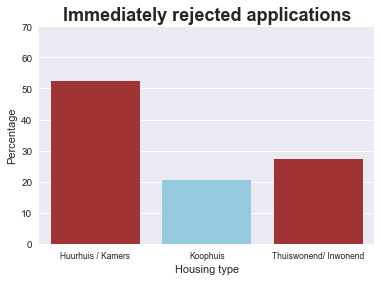

In [193]:
plot_percentages(fail, 'HOUSING_TYPE', 'Housing type', 'Immediately rejected applications', ['firebrick', 'skyblue', 'firebrick'], 70)
plt.savefig('housing_type_fail.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


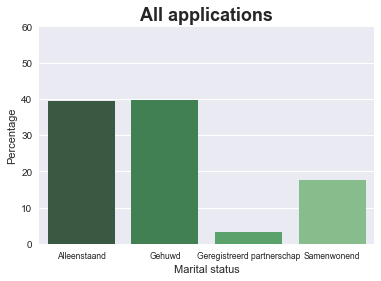

In [155]:
plot_percentages(stats, 'MARITAL_STATUS', 'Marital status', 'All applications', 'Greens_d', 60)
plt.savefig('marital_status_total.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


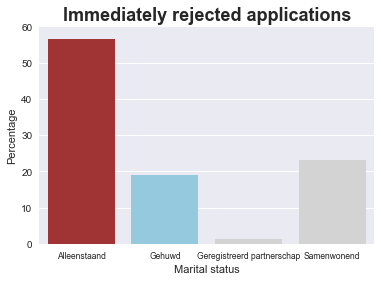

In [161]:
plot_percentages(fail, 'MARITAL_STATUS', 'Marital status', 'Immediately rejected applications', ['firebrick', 'skyblue', 'lightgrey', 'lightgrey'], 60)
plt.savefig('marital_status_fail.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


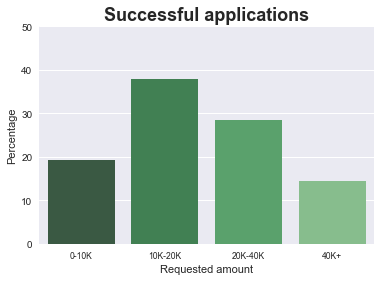

In [167]:
plot_percentages(accept, 'req_amount_group', 'Requested amount', 'Successful applications', 'Greens_d', 50)
plt.savefig('req_amount_groups_accept.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


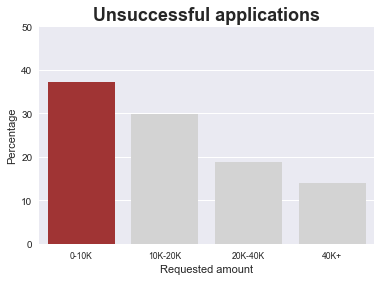

In [174]:
plot_percentages(reject, 'req_amount_group', 'Requested amount', 'Unsuccessful applications', ['firebrick', 'lightgrey', 'lightgrey', 'lightgrey'], 50)
plt.savefig('req_amount_groups_reject.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


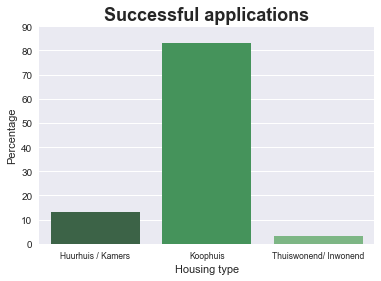

In [183]:
plot_percentages(accept.dropna(), 'HOUSING_TYPE', 'Housing type', 'Successful applications', 'Greens_d', 100)
plt.savefig('housing_type_accept.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


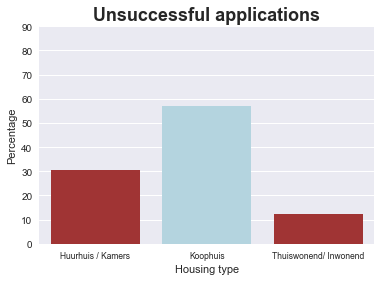

In [194]:
plot_percentages(reject.dropna(), 'HOUSING_TYPE', 'Housing type', 'Unsuccessful applications', ['firebrick', 'lightblue', 'firebrick'], 90)
plt.savefig('housing_type_reject.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


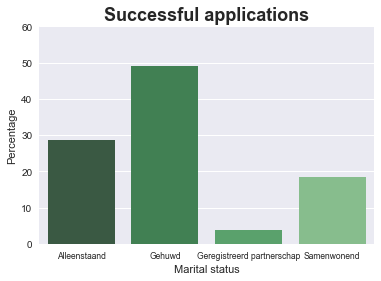

In [187]:
plot_percentages(accept.dropna(), 'MARITAL_STATUS', 'Marital status', 'Successful applications', 'Greens_d', 60)
plt.savefig('marital_status_accept.png', dpi=1000, transparent = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


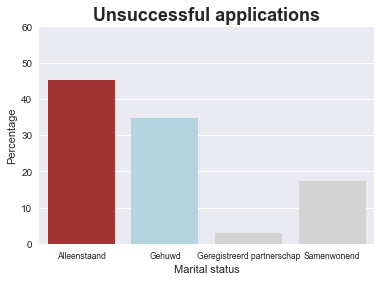

In [189]:
plot_percentages(reject.dropna(), 'MARITAL_STATUS', 'Marital status', 'Unsuccessful applications', ['firebrick', 'lightblue', 'lightgrey', 'lightgrey'], 60)
plt.savefig('marital_status_reject.png', dpi=1000, transparent = True)